# Integrate-and-Fire Neuron with Synaptic Conductance

*by Younginn Park*

Integrate-and-fire neuron model with averaged excitatory ($_E$) and inhibitory ($_I$) inputs from chemical synapses. A simple model for neuronal activity (measured in membrane potential).

Definitions:
- $V$ - neuron activity/membrane potential ($V_r$ - resting potential)
- $S$ - synaptic activation function ($0 \leq S_i(t) \leq 1$)
- $w$ - weight for the synaptic activity
- $f$ - firing rate (opening rate of the receptor channel)
- $\tau$ - membrane time constant of the neuron

Equations:
$$
\begin{cases}
\tau \frac{dV}{dt} = -(V - V_r) - w_E S_E(t) V - w_I S_I(t)(V-V_I) \\
\frac{S_E}{dt}     = -\frac{S_E}{\tau_E} + (1-S_E)f_E \\
\frac{S_I}{dt}     = -\frac{S_I}{\tau_I} + (1-S_E)f_I
\end{cases}
$$

Simplifications:
- $f = f_E = f_I$
- $V_E=0$, 'reversal potential' - membrane potential at which the direction of current changes from positive to negative



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def simulation(V, V_rest, V_th, V_reset, V_inhib, w_E, w_I, f_E, f_I, S_E, S_I, tau_E, tau_I, tau, dt, time, with_ap=True):

    V_trace = []
    S_E_trace = []
    S_I_trace = []
    spike_times = []

    for t in time:

        # action potential
        if (V >= V_th) & with_ap:
            V = V_reset
            spike_times.append(t)

        # synaptic activation
        dS_E = (-S_E / tau_E + (1 - S_E) * f_E) * dt
        dS_I = (-S_I / tau_I + (1 - S_I) * f_I) * dt
        S_E += dS_E
        S_I += dS_I

        # neuron potential
        dV = (-(V - V_rest) - w_E * S_E * V - w_I * S_I * (V - V_inhib)) / tau * dt
        V += dV

        # store values for plots
        V_trace.append(V)
        S_E_trace.append(S_E)
        S_I_trace.append(S_I)

    # plots
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(time, V_trace, label="Membrane Potential (V)")
    plt.axhline(y=V_th, color='r', linestyle='--', label="Threshold Potential")
    plt.ylabel("V (mV)")
    plt.title("Integrate-and-Fire Neuron Model with Synaptic Conductance")
    plt.xlim(0, time[-1])
    plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize='xx-small')

    plt.subplot(4, 1, 2)
    plt.plot(time, S_E_trace, color="b")
    plt.xlim(0, time[-1])
    plt.ylabel("Synaptic Activation S_E")

    plt.subplot(4, 1, 3)
    plt.plot(time, S_I_trace, color="r")
    plt.xlim(0, time[-1])
    plt.ylabel("Synaptic Activation S_I")

    plt.subplot(4, 1, 4)
    plt.xlim(0, time[-1])
    plt.eventplot(spike_times, color='black', linelengths=0.8)
    plt.xlabel("Time (ms)")
    plt.ylabel("Spikes")
    plt.title("Spike Times")

    plt.tight_layout()
    plt.show()


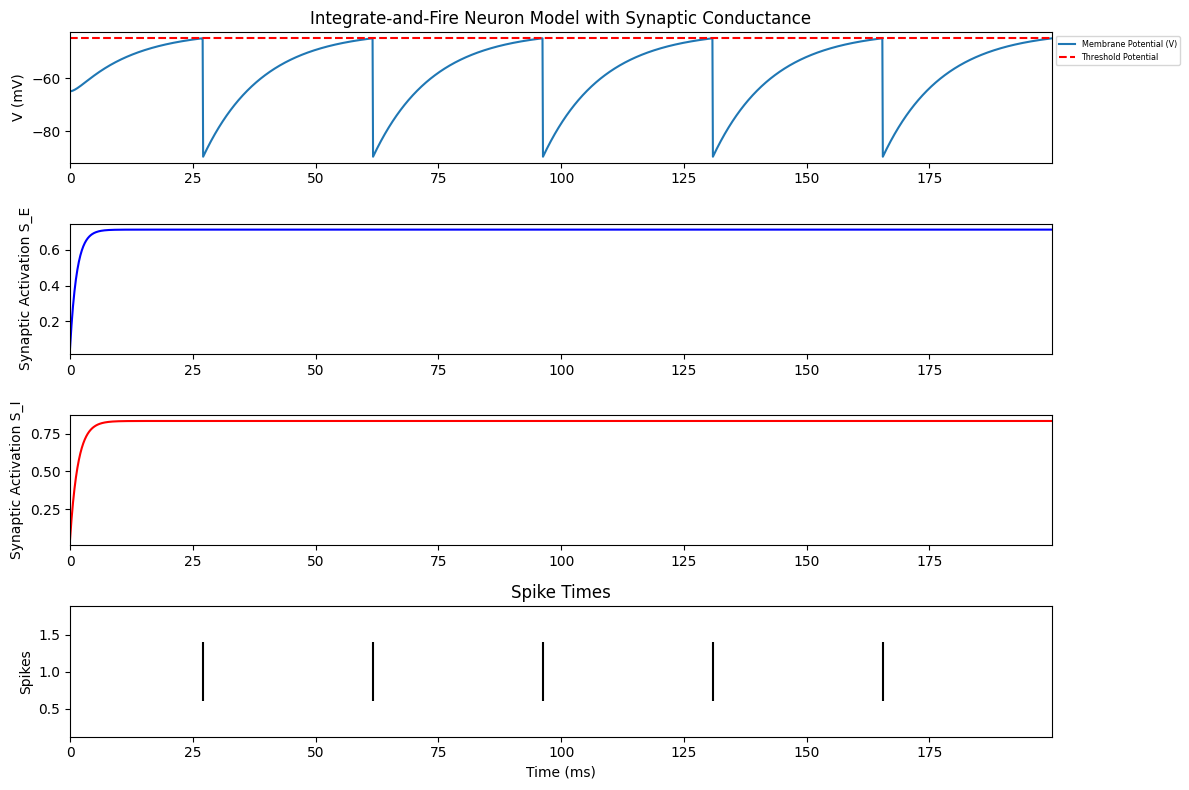

In [ ]:

# Parameters
V_rest = -65.0                  # resting membrane potential
V_inhib = -60.0                 # inhibitory potential
V_th = -45.0                    # threshold potential
V_reset = -90.0                 # reset potential after spike

tau = 20.0                      # membrane time constant
tau_E = 5.0                     # synaptic time constant for excitatory synapse
tau_I = 10.0                    # synaptic time constant for inhibitory synapse

w_E = 0.8                       # synaptic weight for excitatory synapse
w_I = 0.1                       # synaptic weight for inhibitory synapse
f_E = 0.5                       # firing rate for excitatory input
f_I = 0.5                       # firing rate for inhibitory input

V = V_rest                      # initial membrane potential
S_E = 0.0                       # initial synaptic activation for excitatory input
S_I = 0.0                       # initial synaptic activation for inhibitory input

dt = 0.1                        # time step (ms)
time = np.arange(0, 200, dt)    # simulation time (ms)


simulation(V, V_rest, V_th, V_reset, V_inhib, w_E, w_I, f_E, f_I, S_E, S_I, tau_E, tau_I, tau, dt, time, with_ap=True)
